In [2]:
from keras.layers import Dense, LeakyReLU, Dropout, Input
from keras import regularizers, metrics
from keras.models import Model, Sequential
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn import metrics

/Users/schen/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [ ]:
############Data configuration

In [3]:
allSamples = pd.read_csv("/Users/schen/Desktop/scExpression/projects/SAE/data/allgene_celltype_fraction.csv", index_col=0)

In [4]:
allSamples.head()

,hOMTN_6,hProgFPM_6,Unk_6,hNProg_6,hProgFPL_6,hProgM_6,hProgBP_6,hNbML1_6,hEndo_6,hRgl3_6,...,hProgM_11,hRgl1_11,hSert_11,hOMTN_11,hMgl_11,hNbM_11,hDA2_11,hGaba_11,hNbGaba_11,hProgBP_11
DDX11L1,0.000000,0.000000,0.030303,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0,...,0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
WASH7P_p1,0.115385,0.070175,0.030303,0.074074,0.029412,0.108108,0.086957,0.0,0.0,0,...,0,0.111111,0.0,0.0,0.285714,0.0,0.0,0.0,0.000000,0.0
LINC01002_loc4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0,...,0,0.000000,0.0,0.0,0.285714,0.0,0.0,0.0,0.000000,0.0
LOC100133331_loc1,0.153846,0.017544,0.000000,0.037037,0.058824,0.081081,0.130435,0.0,0.0,0,...,0,0.111111,0.0,0.0,0.571429,0.0,0.0,0.0,0.333333,0.0
LOC100132287_loc2,0.038462,0.000000,0.030303,0.000000,0.029412,0.027027,0.000000,0.0,0.0,0,...,0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0


In [5]:
allSamples.shape

(19531, 113)

In [6]:
validation = allSamples.sample(n = 2000, replace = False)

In [7]:
unsuperTrain = allSamples.loc[~allSamples.index.isin(validation.index),]

In [8]:
unsuperTrain.shape

(17531, 113)

In [9]:
autism = pd.read_csv("/Users/schen/Desktop/scExpression/projects/SAE/data/sfari_genescore1_2_celltype_fraction.csv", index_col = 0)

In [10]:
autism.head()

,hOMTN_6,hProgFPM_6,Unk_6,hNProg_6,hProgFPL_6,hProgM_6,hProgBP_6,hNbML1_6,hEndo_6,hRgl3_6,...,hProgM_11,hRgl1_11,hSert_11,hOMTN_11,hMgl_11,hNbM_11,hDA2_11,hGaba_11,hNbGaba_11,hProgBP_11
ADNP,0.384615,0.438596,0.151515,0.444444,0.676471,0.432432,0.369565,0.416667,0.000000,1,...,0,0.333333,0.333333,0.166667,0.428571,0.5,0.25,0.666667,0.333333,0.25
ARID1B,0.576923,0.350877,0.212121,0.259259,0.441176,0.351351,0.434783,0.416667,0.333333,1,...,0,0.111111,0.666667,0.000000,0.428571,0.0,0.25,0.333333,1.000000,0.00
DYRK1A,0.307692,0.280702,0.151515,0.296296,0.500000,0.351351,0.304348,0.333333,0.666667,1,...,0,0.222222,0.000000,0.000000,0.142857,0.5,0.50,0.666667,0.333333,0.00
CHD2,0.576923,0.456140,0.484848,0.518519,0.500000,0.540541,0.456522,0.416667,0.000000,1,...,1,0.666667,0.666667,0.666667,0.571429,0.5,0.75,1.000000,0.333333,0.00
ASH1L,0.615385,0.438596,0.181818,0.370370,0.294118,0.540541,0.478261,0.250000,0.333333,1,...,1,0.777778,0.666667,0.666667,0.428571,0.0,0.75,1.000000,0.333333,0.00


In [11]:
autism.shape

(78, 113)

In [12]:
control = pd.read_csv("/Users/schen/Desktop/scExpression/projects/SAE/data/1911_control_celltype_fraction.csv", index_col=0)

In [13]:
control.head()

,hOMTN_6,hProgFPM_6,Unk_6,hNProg_6,hProgFPL_6,hProgM_6,hProgBP_6,hNbML1_6,hEndo_6,hRgl3_6,...,hProgM_11,hRgl1_11,hSert_11,hOMTN_11,hMgl_11,hNbM_11,hDA2_11,hGaba_11,hNbGaba_11,hProgBP_11
CPEB2,0.153846,0.017544,0.000000,0.074074,0.029412,0.027027,0.021739,0.25,0.333333,0,...,0,0.222222,0.000000,0.166667,0.000000,0.0,0.25,0.000000,0.333333,0.25
ERI2,0.115385,0.157895,0.060606,0.037037,0.147059,0.108108,0.217391,0.00,0.000000,0,...,0,0.000000,0.000000,0.000000,0.142857,0.0,0.00,0.000000,0.000000,0.00
IZUMO1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0,...,0,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.000000,0.000000,0.00
MICAL2,0.038462,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0,...,0,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.000000,0.000000,0.25
MYH10,0.769231,0.614035,0.454545,0.629630,0.735294,0.783784,0.717391,0.75,0.666667,1,...,0,0.555556,0.666667,0.666667,0.142857,1.0,0.50,0.666667,0.000000,0.75


In [14]:
control.shape

(121, 113)

In [15]:
autism.index.intersection(control.index) #should be 0 object

Index([], dtype='object')

In [30]:
combine = [autism, control]

In [31]:
combine = pd.concat(combine)
combine

,hOMTN_6,hProgFPM_6,Unk_6,hNProg_6,hProgFPL_6,hProgM_6,hProgBP_6,hNbML1_6,hEndo_6,hRgl3_6,...,hProgM_11,hRgl1_11,hSert_11,hOMTN_11,hMgl_11,hNbM_11,hDA2_11,hGaba_11,hNbGaba_11,hProgBP_11
ADNP,0.384615,0.438596,0.151515,0.444444,0.676471,0.432432,0.369565,0.416667,0.000000,1,...,0,0.333333,0.333333,0.166667,0.428571,0.5,0.25,0.666667,0.333333,0.25
ARID1B,0.576923,0.350877,0.212121,0.259259,0.441176,0.351351,0.434783,0.416667,0.333333,1,...,0,0.111111,0.666667,0.000000,0.428571,0.0,0.25,0.333333,1.000000,0.00
DYRK1A,0.307692,0.280702,0.151515,0.296296,0.500000,0.351351,0.304348,0.333333,0.666667,1,...,0,0.222222,0.000000,0.000000,0.142857,0.5,0.50,0.666667,0.333333,0.00
CHD2,0.576923,0.456140,0.484848,0.518519,0.500000,0.540541,0.456522,0.416667,0.000000,1,...,1,0.666667,0.666667,0.666667,0.571429,0.5,0.75,1.000000,0.333333,0.00
ASH1L,0.615385,0.438596,0.181818,0.370370,0.294118,0.540541,0.478261,0.250000,0.333333,1,...,1,0.777778,0.666667,0.666667,0.428571,0.0,0.75,1.000000,0.333333,0.00
ASXL3,0.230769,0.052632,0.030303,0.000000,0.058824,0.108108,0.108696,0.333333,0.000000,1,...,0,0.111111,1.000000,0.000000,0.000000,0.0,0.25,0.666667,0.333333,0.25
CHD8,0.384615,0.157895,0.151515,0.074074,0.117647,0.216216,0.326087,0.250000,0.000000,0,...,0,0.222222,0.000000,0.000000,0.285714,0.0,0.25,0.666667,0.000000,0.00
ANK2,0.615385,0.122807,0.121212,0.222222,0.117647,0.162162,0.173913,0.666667,0.333333,1,...,0,0.444444,1.000000,0.833333,0.285714,1.0,0.50,1.000000,1.000000,0.25
CUL3,0.461538,0.368421,0.090909,0.222222,0.500000,0.324324,0.304348,0.333333,0.000000,1,...,0,0.444444,0.000000,0.333333,0.285714,1.0,0.00,0.333333,0.333333,0.25
DSCAM,0.038462,0.000000,0.000000,0.037037,0.029412,0.000000,0.043478,0.250000,0.000000,0,...,0,0.000000,0.333333,0.000000,0.000000,0.0,0.00,0.666667,0.000000,0.00


In [32]:
combine.shape

(199, 113)

In [34]:
prelabel = np.array([1,0])
label = pd.DataFrame({'labels': np.repeat(prelabel, [autism.shape[0], control.shape[0]], axis = 0)})
label.shape

(199, 1)

In [35]:
index_2 = np.random.permutation(label.index)
index_2

array([173,  73,  52, 185, 121,  13,  76, 123, 163, 111,   7, 143, 120,
        68,  91, 195,  36,  41, 137,  82,   4,  99, 174,  93,  29, 119,
        43, 135, 172, 108,  21, 192,  81,  86, 103, 177, 114, 178, 153,
        95, 141, 161,  55, 183, 139, 146,  25,  50,  16, 113,  74,  71,
        88, 186,  40,  77,  53, 147,  26, 104, 158,  78,  64, 154, 150,
       116,  57,  94, 179, 166, 100, 197,  54, 149,  83, 101, 132, 151,
       159, 191, 148,   3,  42,  75,  20,  24, 194,   5,  32,  56,  46,
       122,  69,   9,  31,  18,  61,  85,  70, 175,  35,  98, 164, 182,
        44,   0,  92,  12,  28, 193,  27, 128, 124,  90, 190, 136, 107,
        60,  37, 198, 133, 152, 145, 131, 115, 184,  34, 109, 162,  79,
        22,  33,  45, 138, 126, 105, 106,  87,  65,  72, 129, 140,  23,
       157,  17, 134, 180,  67, 181, 165,  58,  38,  49,  15,  89, 168,
       169, 118,  47,  14,  51, 130, 110,   2, 117, 176, 167, 196,  80,
        30,  11, 187, 142,  84, 160, 127,   1,  62,   6, 171, 12

In [37]:
combine = combine.iloc[index_2]

In [38]:
label = label.iloc[index_2]

In [39]:
label

,labels
173,0
73,1
52,1
185,0
121,0
13,1
76,1
123,0
163,0
111,0


In [62]:
combine_vld = combine.iloc[:40]
combine_vld

,hOMTN_6,hProgFPM_6,Unk_6,hNProg_6,hProgFPL_6,hProgM_6,hProgBP_6,hNbML1_6,hEndo_6,hRgl3_6,...,hProgM_11,hRgl1_11,hSert_11,hOMTN_11,hMgl_11,hNbM_11,hDA2_11,hGaba_11,hNbGaba_11,hProgBP_11
HNRNPAB,0.615385,0.438596,0.242424,0.333333,0.676471,0.621622,0.695652,0.333333,0.666667,1,...,0,0.333333,0.333333,0.166667,0.571429,1.0,0.50,0.666667,0.333333,0.00
SRSF11,0.807692,0.614035,0.333333,0.629630,0.823529,0.756757,0.608696,0.500000,0.333333,1,...,0,0.777778,1.000000,0.666667,0.714286,1.0,0.75,1.000000,1.000000,0.75
MED13,0.346154,0.333333,0.303030,0.370370,0.470588,0.351351,0.413043,0.250000,0.000000,0,...,0,0.333333,0.666667,0.333333,0.285714,0.5,0.25,0.000000,0.000000,0.00
PRSS3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,...,0,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.000000,0.000000,0.00
NSL1,0.307692,0.192982,0.121212,0.148148,0.558824,0.162162,0.282609,0.333333,0.000000,1,...,0,0.111111,0.333333,0.166667,0.000000,0.0,0.00,0.333333,0.666667,0.00
POGZ,0.653846,0.473684,0.181818,0.333333,0.735294,0.486486,0.413043,0.166667,0.000000,1,...,0,0.333333,0.666667,0.333333,0.428571,1.0,0.25,0.666667,0.666667,0.25
UBN2,0.115385,0.140351,0.090909,0.148148,0.176471,0.162162,0.065217,0.000000,0.333333,0,...,0,0.666667,0.000000,0.000000,0.428571,0.0,0.25,0.333333,1.000000,0.00
PABPC1L2A,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,...,0,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.333333,0.000000,0.00
DHX15,0.730769,0.578947,0.333333,0.666667,0.882353,0.567568,0.521739,0.500000,0.666667,1,...,0,0.222222,1.000000,0.166667,0.285714,0.0,0.50,1.000000,0.666667,0.25
KLHL21,0.000000,0.087719,0.030303,0.000000,0.058824,0.108108,0.108696,0.000000,0.000000,0,...,0,0.111111,0.000000,0.000000,0.000000,0.5,0.00,0.000000,0.000000,0.00


In [63]:
label_vld = label.iloc[:40]
label_vld

,labels
173,0
73,1
52,1
185,0
121,0
13,1
76,1
123,0
163,0
111,0


In [64]:
combine_train = combine.iloc[40:]
combine_train.shape

(159, 113)

In [65]:
label_train = label.iloc[40:]
label_train.shape

(159, 1)

In [ ]:
################# unsupervised autoencoder models

In [47]:
Model1 = Sequential()
Model1.add(Dense(64,input_shape = (113,),name = 'inter1'))
Model1.add(LeakyReLU(alpha=0.3))
Model1.add(Dense(113, ))
Model1.add(LeakyReLU(alpha=0.3))
Model1.compile(optimizer = 'adam',loss = 'mean_squared_error')
Model1.fit(unsuperTrain.values, unsuperTrain.values,
           epochs = 50, 
           batch_size = 64,
           validation_data = (validation.values,validation.values))

Train on 17531 samples, validate on 2000 samples
Epoch 1/50
17531/17531 [==============================] - 1s 37us/step - loss: 0.0163 - val_loss: 0.0092
Epoch 2/50
17531/17531 [==============================] - 0s 26us/step - loss: 0.0068 - val_loss: 0.0053
Epoch 3/50
17531/17531 [==============================] - 0s 27us/step - loss: 0.0044 - val_loss: 0.0038
Epoch 4/50
17531/17531 [==============================] - 0s 27us/step - loss: 0.0033 - val_loss: 0.0031
Epoch 5/50
17531/17531 [==============================] - 0s 26us/step - loss: 0.0027 - val_loss: 0.0026
Epoch 6/50
17531/17531 [==============================] - 0s 26us/step - loss: 0.0024 - val_loss: 0.0023
Epoch 7/50
17531/17531 [==============================] - 0s 26us/step - loss: 0.0022 - val_loss: 0.0022
Epoch 8/50
17531/17531 [==============================] - 0s 26us/step - loss: 0.0021 - val_loss: 0.0021
Epoch 9/50
17531/17531 [==============================] - 0s 27us/step - loss: 0.0020 - val_loss: 0.0020
Epoch 

In [48]:
middle1 = Model(inputs = Model1.input,outputs = Model1.get_layer('inter1').output)
middle1_out = middle1.predict(unsuperTrain.values)
middle1_out_vld = middle1.predict(validation.values)

In [49]:
np.max(middle1_out, 0)

array([1.5167397 , 0.17004353, 1.6461128 , 0.18099669, 1.3868533 ,
       1.40956   , 1.5759735 , 0.9950814 , 1.6043108 , 0.1257484 ,
       1.2766984 , 1.604704  , 1.5764555 , 1.4146736 , 1.2264982 ,
       1.1384912 , 1.3104526 , 1.2879629 , 1.420642  , 1.1012299 ,
       1.3731513 , 1.428841  , 1.5945357 , 0.18514538, 1.2656931 ,
       1.4984679 , 1.3881524 , 0.4229545 , 1.3728572 , 1.2951283 ,
       1.1833047 , 1.5339776 , 0.17850325, 1.0861984 , 1.3901451 ,
       1.5054939 , 0.26365525, 1.2378752 , 0.9624445 , 1.4246265 ,
       1.4890302 , 1.3904293 , 1.0119712 , 1.502099  , 1.5703737 ,
       1.295576  , 1.3391943 , 1.7715136 , 1.5855005 , 1.6101325 ,
       1.2627226 , 0.18526521, 1.3717396 , 1.3844817 , 1.2590866 ,
       1.0451193 , 1.171032  , 0.2530517 , 0.9810128 , 2.2865655 ,
       0.1503698 , 0.19692114, 1.2445656 , 1.3696995 ], dtype=float32)

In [51]:
Model2 = Sequential()
Model2.add(Dense(32,input_shape = (64,),name = 'inter2'))
Model2.add(LeakyReLU(alpha = 0.3))
Model2.add(Dense(64,))
Model2.add(LeakyReLU(alpha=0.3))

Model2.compile(optimizer = 'adam',loss = 'mean_squared_error')
Model2.fit(middle1_out,middle1_out,epochs = 50,batch_size = 64, validation_data = (middle1_out_vld,middle1_out_vld))   

Train on 17531 samples, validate on 2000 samples
Epoch 1/50
17531/17531 [==============================] - 1s 35us/step - loss: 0.0759 - val_loss: 0.0307
Epoch 2/50
17531/17531 [==============================] - 0s 21us/step - loss: 0.0274 - val_loss: 0.0243
Epoch 3/50
17531/17531 [==============================] - 0s 21us/step - loss: 0.0228 - val_loss: 0.0212
Epoch 4/50
17531/17531 [==============================] - 0s 21us/step - loss: 0.0201 - val_loss: 0.0189
Epoch 5/50
17531/17531 [==============================] - 0s 21us/step - loss: 0.0179 - val_loss: 0.0169
Epoch 6/50
17531/17531 [==============================] - 0s 20us/step - loss: 0.0161 - val_loss: 0.0153
Epoch 7/50
17531/17531 [==============================] - 0s 20us/step - loss: 0.0146 - val_loss: 0.0139
Epoch 8/50
17531/17531 [==============================] - 0s 22us/step - loss: 0.0132 - val_loss: 0.0126
Epoch 9/50
17531/17531 [==============================] - 0s 21us/step - loss: 0.0119 - val_loss: 0.0114
Epoch 

In [52]:
middle2 = Model(inputs = Model2.input, outputs = Model2.get_layer('inter2').output)
middle2_out = middle2.predict(middle1_out)
middle2_out_vld = middle2.predict(middle1_out_vld)

In [53]:
np.max(middle2_out, 0)

array([0.22252679, 3.2954571 , 0.2484994 , 4.2455482 , 3.3694603 ,
       1.9047996 , 0.36029956, 2.4884493 , 0.1529792 , 5.2515492 ,
       0.35506222, 2.745569  , 4.034813  , 0.40053713, 3.683839  ,
       3.9401019 , 4.2679677 , 0.2634915 , 3.8024805 , 3.8135076 ,
       0.39493513, 0.5839006 , 0.30036116, 3.7628772 , 0.22678193,
       4.0634847 , 3.479897  , 3.852549  , 0.3543836 , 3.080863  ,
       3.8011012 , 0.39515296], dtype=float32)

In [54]:
middle2Out = pd.DataFrame(middle2_out)

In [55]:
middle2Out.shape

(17531, 32)

In [56]:
import pickle as pkl 
import json 
from keras.utils import plot_model

In [57]:
weight_1 = Model1.get_weights()[0]
weight_2 = Model2.get_weights()[0]

In [58]:
# initializer for pre-trained weights; define functions for weight
def my_init1(shape, dtype = None):
    return weight_1

def my_init2(shape,dtype = None):
    return weight_2

In [68]:
mlp = Sequential()
mlp.add(Dropout(0,input_shape=(113,)))
mlp.add(Dense(64,kernel_initializer = my_init1,activity_regularizer=regularizers.l1(10e-7)))
mlp.add(LeakyReLU(alpha = 0.3))
mlp.add(Dropout(0.2))
mlp.add(Dense(32,kernel_initializer = my_init2,activity_regularizer=regularizers.l1(10e-7)))
mlp.add(LeakyReLU(alpha = 0.3))
mlp.add(Dense(1,activation='sigmoid'))
#mlp.add(LeakyReLU(alpha = 0.3))
#adam = keras.optimizers.Adam(lr=0.0005)
mlp.compile(loss = 'binary_crossentropy',
		optimizer = 'adam',
		metrics = ['binary_accuracy'])

In [69]:
mlp.fit(combine_train.values,label_train,epochs = 70,batch_size = 64, 
        validation_data=(combine_vld.values, label_vld))

Train on 159 samples, validate on 40 samples
Epoch 1/70
159/159 [==============================] - 0s 2ms/step - loss: 0.6784 - binary_accuracy: 0.5597 - val_loss: 0.7520 - val_binary_accuracy: 0.4000
Epoch 2/70
159/159 [==============================] - 0s 54us/step - loss: 0.6788 - binary_accuracy: 0.6289 - val_loss: 0.7362 - val_binary_accuracy: 0.4000
Epoch 3/70
159/159 [==============================] - 0s 56us/step - loss: 0.6403 - binary_accuracy: 0.6604 - val_loss: 0.7224 - val_binary_accuracy: 0.4750
Epoch 4/70
159/159 [==============================] - 0s 49us/step - loss: 0.6458 - binary_accuracy: 0.6981 - val_loss: 0.7217 - val_binary_accuracy: 0.4750
Epoch 5/70
159/159 [==============================] - 0s 52us/step - loss: 0.6174 - binary_accuracy: 0.6981 - val_loss: 0.7088 - val_binary_accuracy: 0.5000
Epoch 6/70
159/159 [==============================] - 0s 50us/step - loss: 0.6145 - binary_accuracy: 0.7170 - val_loss: 0.6995 - val_binary_accuracy: 0.5250
Epoch 7/70
159

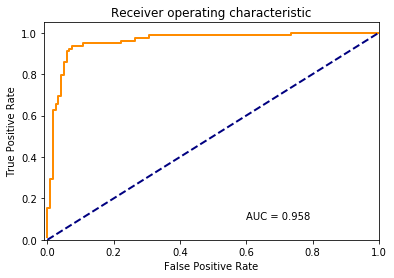

In [83]:
########plotting ROC curve
from sklearn.metrics import roc_curve, auc

y_true = label

y_score = mlp.predict(combine)

fpr, tpr, thresholds = metrics.roc_curve(y_true, y_score, pos_label=1)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.text(0.6, 0.1, 'AUC = 0.958')
#plt.show()
plt.savefig('/Users/schen/Desktop/scExpression/projects/SAE/plot/ROC_all_training')

In [82]:
auc(fpr,tpr)

0.9582538673447765